## test

In [1]:
from nn import Model
from nn import Linear, ReLu, Softmax, CrossEntropy, Dropout
import numpy as np

# model that has the same structure as the model you want to load
layers = [
    Linear(3072, 256),
    ReLu(),
    Dropout(0),
    Linear(256, 10),
    Softmax()
]
model = Model(layers)
# loading the model, change the path to the path of the model you want to load
model.load(r'saved_model\adam_h256_lr0_001_wd0_001_ss5_g0_8_d0_0_epoch30\model.pkl')
model.eval()

In [ ]:
from utils import CIFAR10Dataset, standardize, dataloader_generator, evaluate_accuracy_and_loss

file_path = r'dataset\cifar-10-batches-py'
test_set = CIFAR10Dataset(file_path, train=False, transform=standardize)
loss = CrossEntropy(10)

# accuracy and loss in test set
evaluate_accuracy_and_loss(model, dataloader_generator(test_set, batch_size=64, shuffle=False), loss)

(0.5095, 1.4214993423676092)

## visiualization

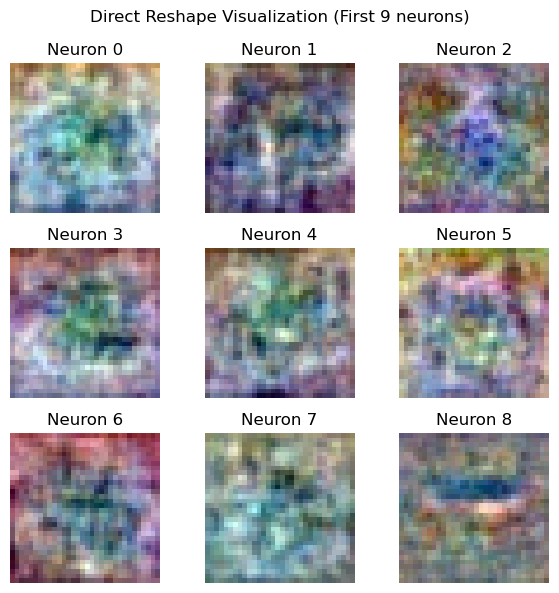

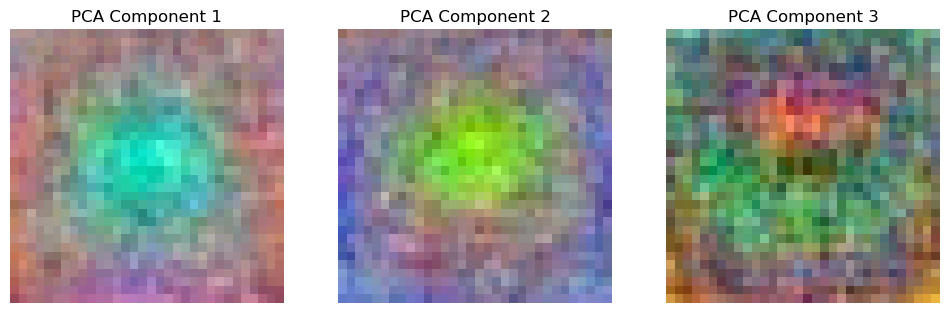

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ======= visualizing first layer =======
first_linear = model.layers[0] 
weights = first_linear.weights  # (3072, 512)

# -------- method 1 : directly plot--------
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i in range(9):
    w = weights[:, i]
    w = w.reshape(32, 32, 3)
    w = (w - w.min()) / (w.max() - w.min())  # 归一化到[0,1]
    ax = axes[i // 3, i % 3]
    ax.imshow(w)
    ax.axis('off')
    ax.set_title(f'Neuron {i}')

plt.suptitle('Direct Reshape Visualization (First 9 neurons)')
plt.tight_layout()
plt.show()

# -------- method 2: pca --------

pca = PCA(n_components=3)
pca_result = pca.fit_transform(weights) 
plt.figure(figsize=(12, 5))
for i in range(3):
    pca_img = (pca_result[:,i] - pca_result[:,i].min()) / (pca_result[:,i].max() - pca_result[:,i].min())
    pca_img = pca_img.reshape(32, 32, 3)
    plt.subplot(1, 3, i+1)
    plt.imshow(pca_img)
    plt.axis('off')
    plt.title(f'PCA Component {i+1}')
plt.show()